In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [2]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
data = pd.read_csv("csel_(unHPO-Optuna-Combinations).csv")

In [4]:
data = data[["Hyperparameter","ACC","PPV","TPR","AUC"]]

In [5]:
data = data.melt(id_vars=["Hyperparameter"],value_name="values",var_name="metrics")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TPR_unHPO vs. TPR_Optuna: Wilcoxon test (paired samples), P_val:2.734e-02 Stat=6.000e+00
AUC_unHPO vs. AUC_Optuna: Wilcoxon test (paired samples), P_val:1.953e-02 Stat=5.000e+00
PPV_Optuna vs. PPV_Combinations: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=2.700e+01
TPR_Optuna vs. TPR_Combinations: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=2.700e+01
AUC_Optuna vs. AUC_Combinations: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=2.700e+01
ACC_unHPO vs. ACC_Optuna: Wilcoxon test (paired samples), P_val:2.734e-02 Stat=6.000e+00
PPV_unHPO vs. PPV_Optuna: Wilcoxon test (paired samples), P_val:2.734e-02 Stat=6.000e+00
ACC_Optuna vs. ACC_Combinations: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=2.700e+01
TPR_unHPO vs. TPR_Combinations: Wilcoxon test (paired samples), P_va

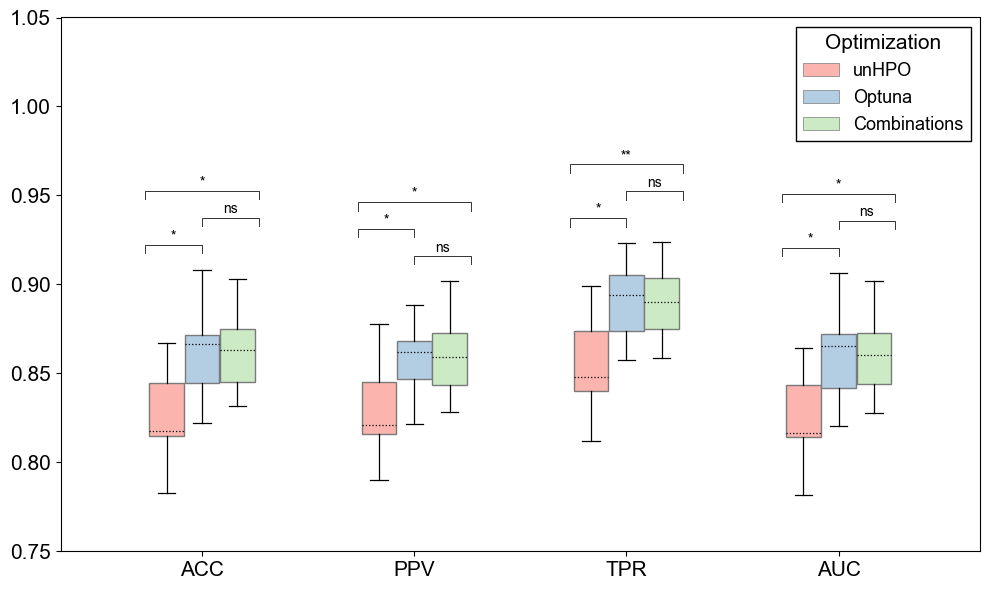

In [6]:
plt.figure(figsize=(10,6))
x = "metrics"
y = "values"
hue = "Hyperparameter"
hue_order = ["unHPO", "Optuna","Combinations"]


ax = sns.boxplot(data=data, x=x, y=y, hue=hue, width=0.5, linewidth=1.0 , palette='Pastel1' ,saturation=1,
                 medianprops={'linestyle':':' , 'linewidth':0.9 , 'color':'#000000'},
                 capprops={'linestyle':'-' , 'color':'#000000' , 'linewidth':0.9},
                 whiskerprops={'linestyle':'-' , 'color':'#000000' , 'linewidth':0.9},

                 showfliers=False)

pairs = [(("ACC", 'unHPO'), ("ACC", 'Combinations')),
        
        (("PPV", 'unHPO'), ("PPV", 'Combinations')),
        
        (("TPR", 'unHPO'), ("TPR", 'Combinations')),
     
        (("AUC", 'unHPO'), ("AUC", 'Combinations')),

        (("ACC", 'unHPO'), ("ACC", 'Optuna')),

        (("PPV", 'unHPO'), ("PPV", 'Optuna')),

        (("TPR", 'unHPO'), ("TPR", 'Optuna')),

        (("AUC", 'unHPO'), ("AUC", 'Optuna')),
         
        (("ACC", 'Combinations'), ("ACC", 'Optuna')),

        (("PPV", 'Combinations'), ("PPV", 'Optuna')),

        (("TPR", 'Combinations'), ("TPR", 'Optuna')),

        (("AUC", 'Combinations'), ("AUC", 'Optuna'))
        ]

annot = Annotator(ax, pairs, plot='boxplot',
                  data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annot.configure(test='Wilcoxon', text_format='star',line_height=0.03,line_width=0.7)
annot.apply_test()
annot.annotate()


plt.legend(fontsize=13,title='Optimization',framealpha=1,fancybox=False,edgecolor='black',title_fontsize=15)

ax.set_ylim(bottom=0.75,top=1.05)
ax.tick_params(labelsize=15)

ax.set_xlabel('',size=20,labelpad=15)
ax.set_ylabel('',size=20,labelpad=15)


plt.tight_layout()

plt.savefig('S-Fig3-b.pdf', bbox_inches='tight')
plt.show()